#Worksheet - 1

##Installation and Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# !pip install pillow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

##Exercise - 1:

###1. Read and Display Image

In [4]:
colored_image = Image.open("/content/drive/MyDrive/AI and ML/Week - 1 - Introduction to Linear Algebra for Deep Learning/lenna_image.png")

In [5]:
print("Format: ", colored_image.format)
print("Mode: ", colored_image.mode)
print("Size: ", colored_image.size)

Format:  PNG
Mode:  RGBA
Size:  (713, 357)


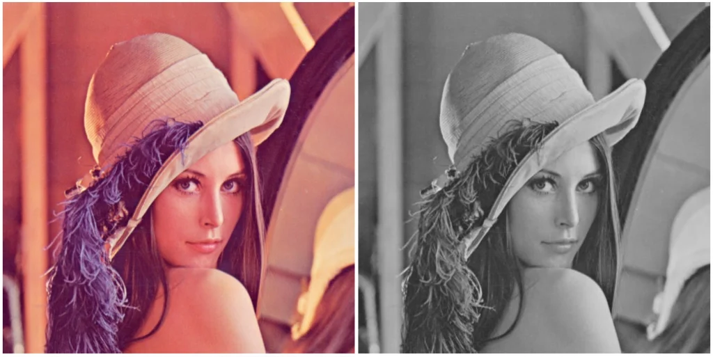

In [6]:
colored_image = colored_image.convert("RGB")
display(colored_image)

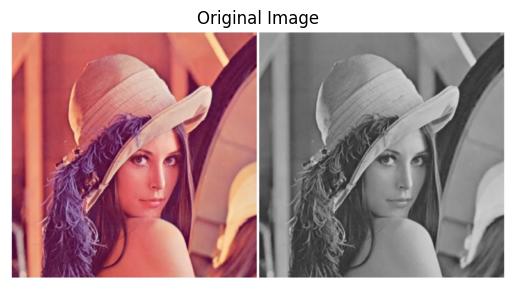

In [7]:
image_array = np.array(colored_image)
plt.imshow(image_array)
plt.axis("off")
plt.title("Original Image")
plt.show()

###2. Display top corner of 100*100 pixels

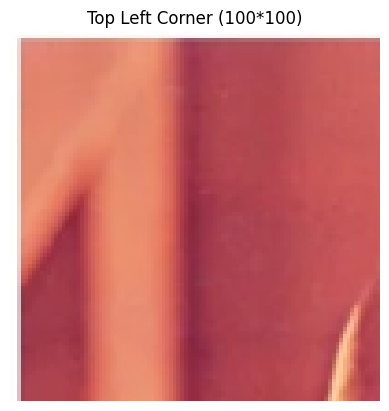

In [8]:
image_array = np.array(colored_image)

top_left = image_array[:100, :100]

plt.axis("off")
plt.title("Top Left Corner (100*100)")
plt.imshow(top_left)
plt.show()

###3. Displaying Color Channels

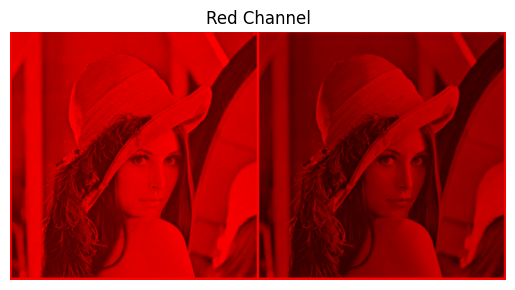

In [9]:
red_channel = image_array.copy()
red_channel[:, :, 1] = 0
red_channel[:, :, 2] = 0
plt.axis("off")
plt.title("Red Channel")
plt.imshow(red_channel)
plt.show()

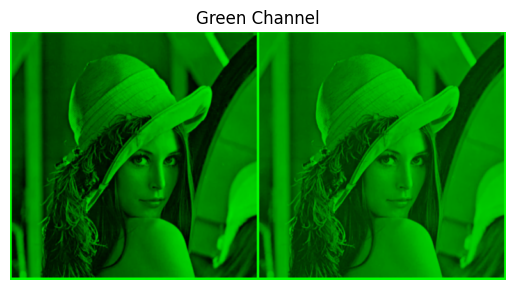

In [10]:
green_channel = image_array.copy()
green_channel[:, :, 0] = 0
green_channel[:, :, 2] = 0
plt.axis("off")
plt.title("Green Channel")
plt.imshow(green_channel)
plt.show()

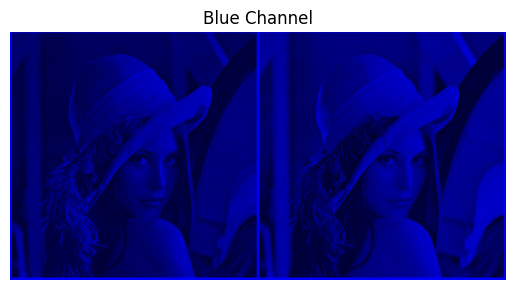

In [11]:
blue_channel = image_array.copy()
blue_channel[:, :, 1] = 0
blue_channel[:, :, 0] = 0
plt.axis("off")
plt.title("Blue Channel")
plt.imshow(blue_channel)
plt.show()

###4. Top 100 * 100 modification

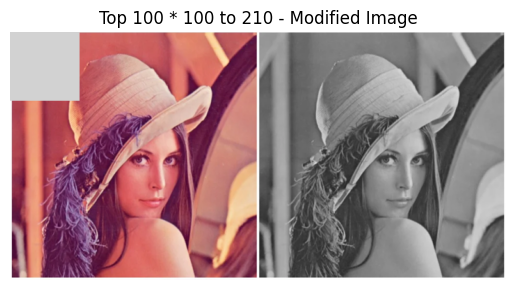

In [12]:
image_modified = image_array.copy()
image_modified[:100, :100] = 210

plt.axis("off")
plt.title("Top 100 * 100 to 210 - Modified Image")
plt.imshow(image_modified)
plt.show()

##Exercise - 2:

###1. Load and Display Grayscale Image

In [15]:
image_grayscale = Image.open("/content/drive/MyDrive/AI and ML/Week - 1 - Introduction to Linear Algebra for Deep Learning/cameraman.png").convert("L")

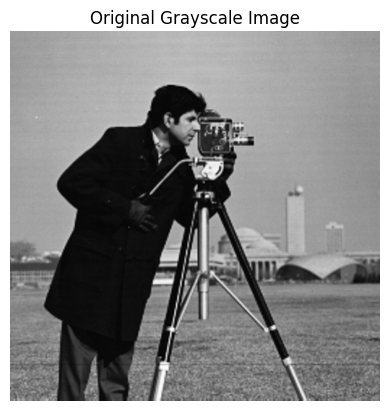

In [16]:
image_array = np.array(image_grayscale)

plt.title("Original Grayscale Image")
plt.axis("off")
plt.imshow(image_array, cmap="gray")
plt.show()

###2. Extract Middle 150 pixels of Image

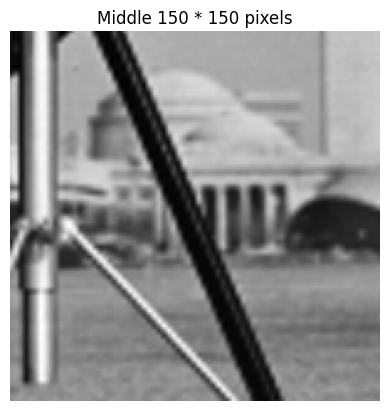

In [17]:
width, height = image_array.shape

col_start = (width // 2)
row_start = (height // 2 )
mid_section = image_array[row_start:row_start+150, col_start:col_start+150]


plt.title("Middle 150 * 150 pixels")
plt.axis("off")
plt.imshow(mid_section, cmap="gray")
plt.show()

### 3.Apply a simple threshold to Image

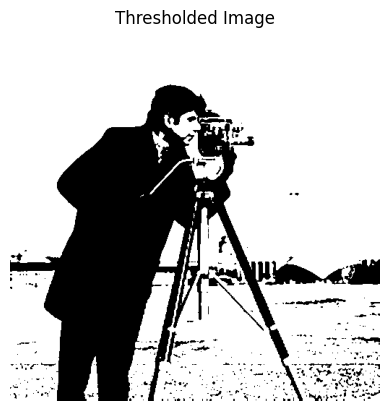

In [18]:
binary_image = np.zeros_like(image_array, dtype=np.uint8)

height, width = image_array.shape

for i in range(height):
    for j in range(width):
        if image_array[i, j] < 100:
            binary_image[i, j] = 0
        else:
            binary_image[i, j] = 255

plt.title("Thresholded Image")
plt.axis("off")
plt.imshow(binary_image, cmap="gray")
plt.show()

###4. Rotate Image 90 deg

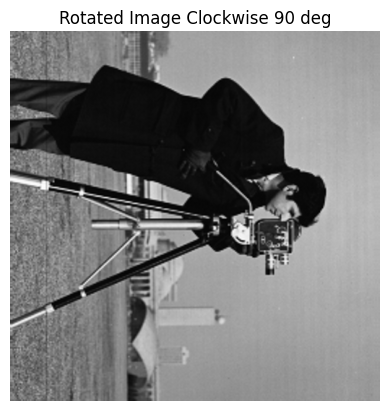

In [19]:
rotate_image = image_grayscale.rotate(-90, expand = True)

plt.title("Rotated Image Clockwise 90 deg")
plt.axis("off")
plt.imshow(rotate_image, cmap="gray")
plt.show()

###5. Convert Grayscale to RGB image

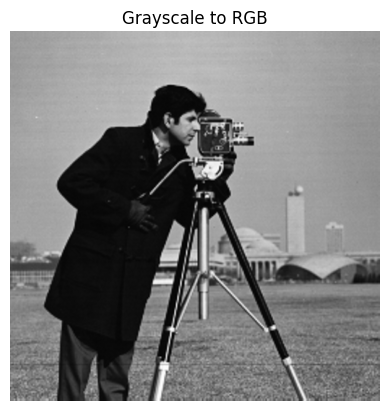

In [20]:
image_colored = Image.merge("RGB", (image_grayscale, image_grayscale, image_grayscale))

plt.title("Grayscale to RGB")
plt.axis("off")
plt.imshow(image_colored, cmap="gray")
plt.show()

##Exercise - 3:

###1. Load and Prepare Data

In [22]:
image = Image.open("/content/drive/MyDrive/AI and ML/Week - 1 - Introduction to Linear Algebra for Deep Learning/lenna_image.png").convert("L")

(357, 713)


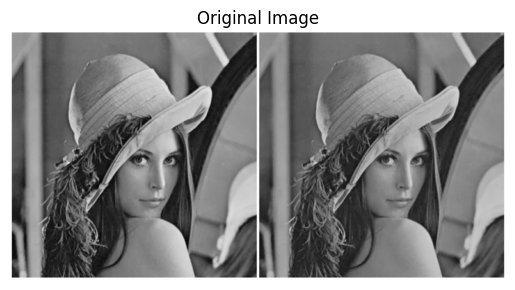

In [23]:
image_array = np.array(image)
print(image_array.shape)

height, width = image_array.shape

data = image_array.copy()

plt.title("Original Image")
plt.axis("off")
plt.imshow(image_array, cmap='gray')
plt.show()

In [24]:
mean = np.mean(data, axis = 0)
centered_data = data - mean
centered_data

array([[ 2.66106443e-01,  1.12044818e-02,  5.40812325e+01, ...,
         3.92044818e+01,  1.12044818e-02,  5.21008403e-01],
       [ 2.66106443e-01, -1.98879552e+00,  4.90812325e+01, ...,
         3.42044818e+01, -9.88795518e-01, -4.78991597e-01],
       [ 2.66106443e-01, -1.98879552e+00,  2.50812325e+01, ...,
         3.20448179e+00,  1.12044818e-02, -2.47899160e+00],
       ...,
       [ 1.26610644e+00,  1.12044818e-02,  5.40812325e+01, ...,
         3.92044818e+01, -1.98879552e+00, -4.78991597e-01],
       [ 1.26610644e+00,  1.12044818e-02,  5.30812325e+01, ...,
         3.92044818e+01, -9.88795518e-01, -4.78991597e-01],
       [ 2.66106443e-01,  1.12044818e-02,  5.30812325e+01, ...,
         4.02044818e+01,  1.12044818e-02,  5.21008403e-01]])

In [25]:
cov_matrix = np.cov(centered_data, rowvar = False)
cov_matrix

array([[ 9.54269348e-01, -2.98996003e-03,  2.60755988e-02, ...,
        -9.53443175e-01, -1.14169263e-02, -1.39269191e-03],
       [-2.98996003e-03,  2.23460171e-02, -4.16643062e-01, ...,
        -2.10162717e-01,  5.49208447e-03,  1.66178831e-02],
       [ 2.60755988e-02, -4.16643062e-01,  1.80895068e+02, ...,
        -9.86778082e+00, -5.90800365e-01, -1.19693608e+00],
       ...,
       [-9.53443175e-01, -2.10162717e-01, -9.86778082e+00, ...,
         2.50533912e+02, -4.26454852e-01,  3.26956850e+00],
       [-1.14169263e-02,  5.49208447e-03, -5.90800365e-01, ...,
        -4.26454852e-01,  1.67280395e-02,  5.38192805e-03],
       [-1.39269191e-03,  1.66178831e-02, -1.19693608e+00, ...,
         3.26956850e+00,  5.38192805e-03,  3.73855160e-01]])

In [26]:
cov_matrix.shape

(713, 713)

###2. Eigen Decomposition and Identifying Pricipal Components

In [27]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [28]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

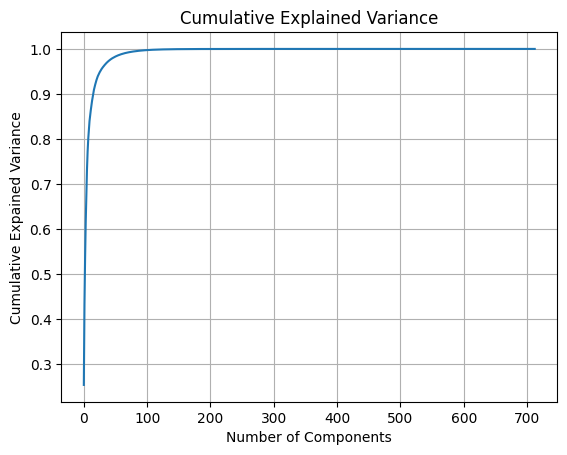

In [29]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Expained Variance")
plt.grid(True)
plt.show()

### 3.Reconstruction and Experiment

In [30]:
k1 = 10
k2 = 20
k3 = 50
k4 = 100
k5 = 150

components1 = eigenvectors[:, :k1]
components2 = eigenvectors[:, :k2]
components3 = eigenvectors[:, :k3]
components4 = eigenvectors[:, :k4]
components5 = eigenvectors[:, :k5]

In [31]:
compressed_data1 = np.dot(centered_data, components1)
compressed_data2 = np.dot(centered_data, components2)
compressed_data3 = np.dot(centered_data, components3)
compressed_data4 = np.dot(centered_data, components4)
compressed_data5 = np.dot(centered_data, components5)

In [32]:
decompressed_data1 = np.dot(compressed_data1, components1.T) + mean
decompressed_data2 = np.dot(compressed_data2, components2.T) + mean
decompressed_data3 = np.dot(compressed_data3, components3.T) + mean
decompressed_data4 = np.dot(compressed_data4, components4.T) + mean
decompressed_data5 = np.dot(compressed_data5, components5.T) + mean

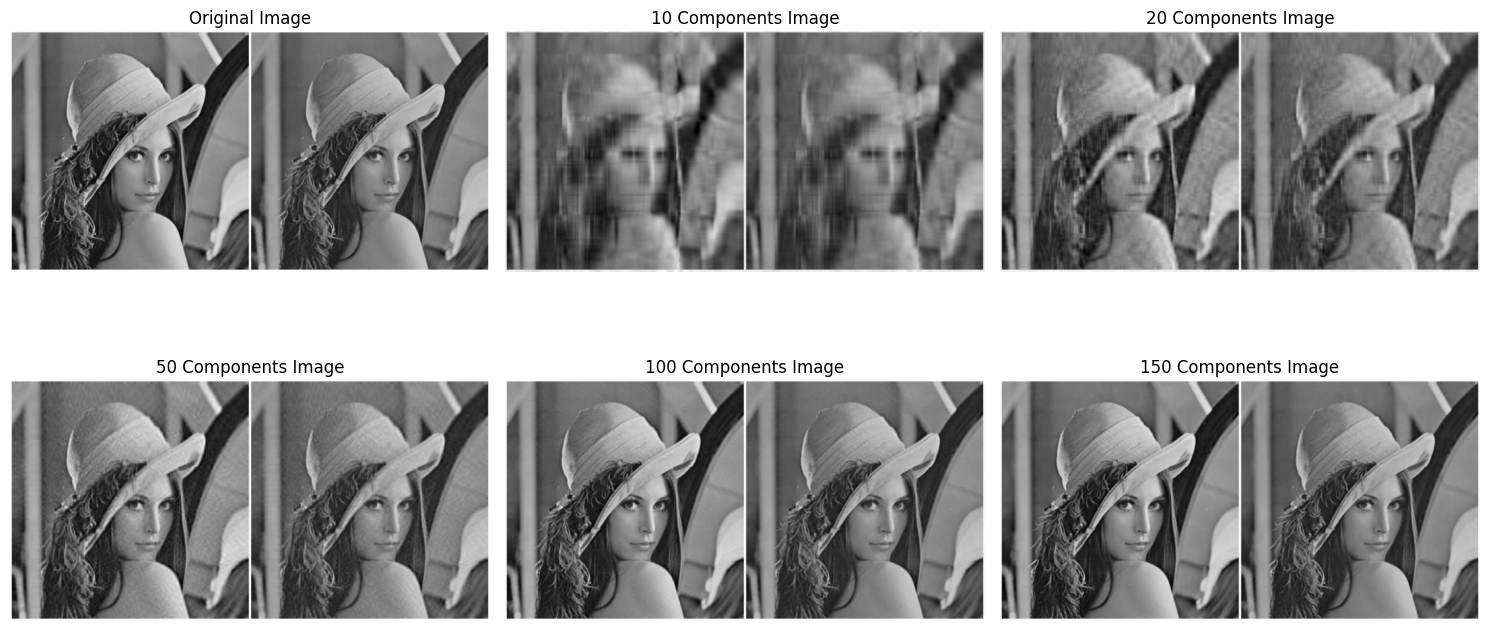

In [33]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(decompressed_data1, cmap="gray")
plt.title("10 Components Image")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(decompressed_data2, cmap="gray")
plt.title("20 Components Image")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(decompressed_data3, cmap="gray")
plt.title("50 Components Image")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(decompressed_data4, cmap="gray")
plt.title("100 Components Image")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(decompressed_data5, cmap="gray")
plt.title("150 Components Image")
plt.axis("off")

plt.tight_layout()
plt.show()
